# Classificação de Clientes
O objetivo deste processo é classificar novos clientes a partir dos clusters de clientes atuais

Ao logo do tempo novos clientes farão parte do processo de classificação, trazendo uma retroalimentação para o processo de classificação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# carrega o dataset
dataset = pd.read_csv('01.1-clusterizacao-kmeans.csv', delimiter=';', decimal=',')

faturamentoBruto = dataset['faturamentoBruto']
margemBruta = dataset['margemBruta']
restricoes = dataset['restricoes']
cluster = dataset["cluster"]

dataset_norm = pd.concat([faturamentoBruto, margemBruta, restricoes], axis=1)

scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(dataset_norm)
dataset_norm = pd.DataFrame(dataset_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
dataset_norm = pd.concat([dataset_norm, cluster], axis=1)

# print(dataset.head())

Temos 7 clusters de clientes, distribuidos conforme vemos visualmente abaixo

<AxesSubplot:xlabel='cluster', ylabel='count'>

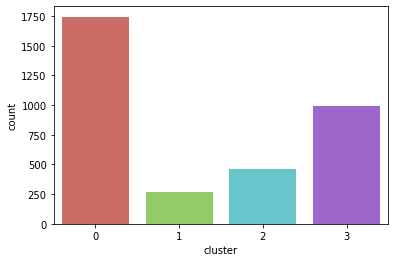

In [3]:
sb.countplot(x='cluster', data=dataset, palette='hls')

## classificação 
O processo de classificação passa pelo uso dos dados de clientes já conhecidos e clusterizados. Utilizamos o mecanismos de testes a partir dos clientes já conhecidos onde vemos a performance de classificação de 100%. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       299

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043

0.9990412272291467


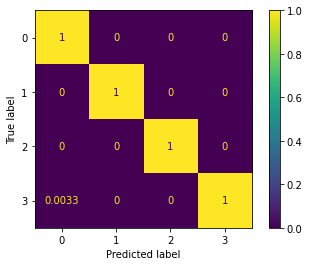

In [4]:
dataset0 = dataset_norm[(dataset_norm['cluster'] == 0)]
dataset1 = dataset_norm[(dataset_norm['cluster'] == 1)]
dataset2 = dataset_norm[(dataset_norm['cluster'] == 2)]
dataset3 = dataset_norm[(dataset_norm['cluster'] == 3)]

X0 = dataset0.iloc[:,[0,1,2]].values
y0 = dataset0.iloc[:,3].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.3, random_state=25)

X1 = dataset1.iloc[:,[0,1,2]].values
y1 = dataset1.iloc[:,3].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=25)

X2 = dataset2.iloc[:,[0,1,2]].values
y2 = dataset2.iloc[:,3].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=25)

X3 = dataset3.iloc[:,[0,1,2]].values
y3 = dataset3.iloc[:,3].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.3, random_state=25)

X_train = np.concatenate([X0_train, X1_train, X2_train, X3_train], axis=0)
X_test = np.concatenate([X0_test, X1_test, X2_test, X3_test], axis=0)
y_train = np.concatenate([y0_train, y1_train, y2_train, y3_train], axis=0)
y_test = np.concatenate([y0_test, y1_test, y2_test, y3_test], axis=0)

#Classif_KNN = KNeighborsClassifier(n_neighbors=4)
#Classif_KNN.fit(X_train, y_train)
#y_pred = Classif_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))


# testa do K=1 até K=26
#k_range = range(1, 26)

# Lista todas as acurácias
#scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
#    y_pred = knn.predict(X_test)
#    scores.append(accuracy_score(y_test, y_pred))

#print(scores)
#Plota os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=3)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(best_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [5]:
def ajustaDatasete(datasete):
# periodoDemonstrativoEmMeses -> converte valores nulos ou 0 em 1
    datasete['periodoDemonstrativoEmMeses'] = datasete['periodoDemonstrativoEmMeses'].replace(np.nan, 1)
    datasete['periodoDemonstrativoEmMeses'] = datasete['periodoDemonstrativoEmMeses'].replace(0, 1)

# faturamentoBruto -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    datasete['faturamentoBruto'] = datasete['faturamentoBruto'].replace(np.nan, 0)
    datasete['faturamentoBruto'] = datasete['faturamentoBruto'] / datasete['periodoDemonstrativoEmMeses']

# margemBruta -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    datasete['margemBruta'] = datasete['margemBruta'].replace(np.nan, 0)
    datasete['margemBruta'] = datasete['margemBruta'] / datasete['periodoDemonstrativoEmMeses']

# monta o datasete que será trabalhado
    datasete = pd.concat([
        datasete["faturamentoBruto"],
        datasete["margemBruta"],
        datasete["restricoes"]
    ], axis=1)

# faturamentoBruto -> remove valores nulos ou inferiores a 1.000,00 (outliers?)
    datasete.dropna(subset=['faturamentoBruto'], inplace=True)
    faturamentoBrutoIdx = datasete[(datasete['faturamentoBruto'] < 1000.0)].index
    datasete.drop(faturamentoBrutoIdx, inplace=True)
# faturamentoBruto -> remove valores nulos ou superiores a 550.000.000,00 (fora do modelo)
    faturamentoBrutoIdx = datasete[(datasete['faturamentoBruto'] > 1000000.0)].index
    datasete.drop(faturamentoBrutoIdx, inplace=True)

# restricoes -> converte valores nulos em falso e transforma bool em int
    datasete['restricoes'] = datasete['restricoes'].replace(np.nan, False)
    datasete['restricoes'] = datasete['restricoes'].astype(int)

# indexa novamente o datasete para remover índices ainda em memória
    datasete.reset_index(drop=True, inplace=True)
    
    return(datasete)


## Teste do Classificador utilizando dados Reais
Buscamos um arquivo da CVM, com dados de resultado de empresas abertas do ano de 2016.

A partir destes dados, efetuamos a preparação para aplicação do modelo, normalizando o faturamento e margem para período mensal. 

Como um modelo de classificação trabalha com situações previamente conhecidas, eliminamos empresas com faturamento acima dos conhecidos através da divisão por uma constante aleatória.

In [28]:
# Dados Obtidos da CVM - http://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp/resource/fdf29235-55ab-40e7-8de8-3a9bc58621ed
# carrega o dataset de novos clientes
novosclientes = pd.read_csv('novos-clientes-meu.csv', delimiter=';', decimal=',')
#LOCAL
print(novosclientes.count())

novosclientes['faturamentoBruto'] = (novosclientes['faturamentoBruto'] / 581.53246789) 
#novosclientes = pd.read_csv('novos-clientes.csv', encoding = "ISO-8859-1")

newDataset = ajustaDatasete(novosclientes)
# newDataset.head()
print(newDataset.count())

#Normaliza pelo escalar
    # scaler = MinMaxScaler()
datasete_norm = scaler.transform(newDataset)
datasete_norm = pd.DataFrame(datasete_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
    #datasete = pd.concat([datasete, cluster], axis=1)


faturamentoBruto               338
periodoDemonstrativoEmMeses    338
margemBruta                    338
restricoes                     338
dtype: int64
faturamentoBruto    240
margemBruta         240
restricoes          240
dtype: int64


In [29]:
def classificaClientes(clientes):
    return best_KNN.predict(clientes)
    

In [30]:
clientesClassificados = classificaClientes(datasete_norm)
#clientesClassificados.head()
clientesClassificados

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [31]:
newDataset['cluster'] = pd.DataFrame(clientesClassificados)
newDataset

,faturamentoBruto,margemBruta,restricoes,cluster
0,419804.447983,1.330303e+08,0,2
1,303014.608922,1.530358e+08,0,2
2,8032.512241,1.330633e+07,0,2
3,6607.684945,1.885917e+06,0,0
4,39430.873768,8.988333e+06,0,2
...,...,...,...,...
235,924508.139590,2.145902e+08,0,2
236,118977.736390,5.308933e+07,0,2
237,111314.363756,4.716900e+07,0,2
238,7664.948929,3.702917e+06,0,0


In [34]:
newDataset.groupby(by=['cluster','restricoes']).count()

faturamentoBruto  margemBruta
cluster restricoes                               
0       0                         28           28
1       1                          6            6
2       0                        190          190
        1                         16           16

In [33]:
# salva os dados clusterizados em csv
newDataset.to_csv(path_or_buf='02.1-classificacao-knn.csv', sep=';', decimal=',')